# 7.07 Decision Trees for Regression and Classifications - Cross validation

### learning objectives
* Describe how Decision Trees solve regression and classification problems
* Implement simple decision trees
* Identify and use key parameters while developing a decision tree model

* Understand cross validation technique



# Lesson 1

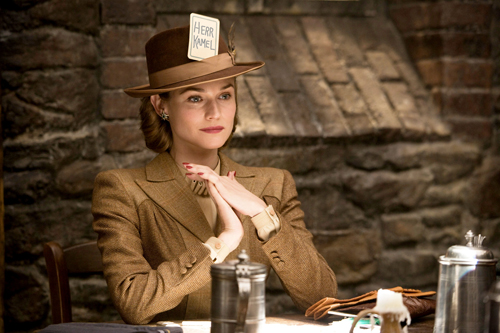

In [28]:
from IPython.display import Image
Image(filename='hammersmark.jpg')

* who am i
    * what question would you ask first, when it comes to ask for actors and actresses?
    * why ask "male / female" and not "is it Scarlett Johannson"?
    * you could as "is it scarlett johannson", but only if  you have additional information, e.g. you have a fan of Scarlett Johannson in front of you.
* this is basically the **principle of a decision tree**.
* **decision tree model**
 * would be a learned strategy to get to the right actor /actress the most efficient way
 * meaning asking as few questions as possible
 * and to predict with highest accuracy

* **"Who am I"**: you have a trained decision tree model saved in your head, performing  quite well to predict unknown actors and actresses!
    * you have trained it over the course of your life with knowledge about actresses and actors

#### real world decision trees in data analytics
* and now our task it it, to apply that concept to any case, where the relationship between the target we want to predict
    * resulting trees for real world problems are not so easily categorically ordered
    * questions can repeat in branches.
    * questions can in appear in 1 branch earlier, in another later

#### structure of a decision tree
* They work with stratifying or segmenting the predictor space into a number of binary decisions to make the prediction.

* Each binary split consists of a decision rule which either sends us left or sends us right.
* Decision trees can be used both for regression and classification problems

* **Pure decision tree is not as competitive** compared to
    * **random forests**, bagging and boosting,
    * those consist of thousands of trees
    * and they then aggregat the results to yield a single prediction.
    * will talk about them next days
    
* We will take a look at these methods later this week. In a workshop. But decision trees form the basis of those aforementioned algorithms.

#### strategy to build a DT

* Where to start, which question to ask first, which should be the root node?
    * test each feature. Which would predict the target best, **alone**?

* building next nodes
    * ask again for the remaining observations, for all the features whether any of them can predict best
    * usually none of them can predict ideal way
    * meaning: none has usually 100% of a single category and 0% of the others
    * you check for every feature for **impurity**
    * **Gini-impurity**
    * very well explained by stats quest (https://www.youtube.com/watch?v=7VeUPuFGJHk)
    * another strategy: **entropy**
    * we can't go deeper into that
* build nodes until you arrive at a leaf with 100% impurity. This is your end note


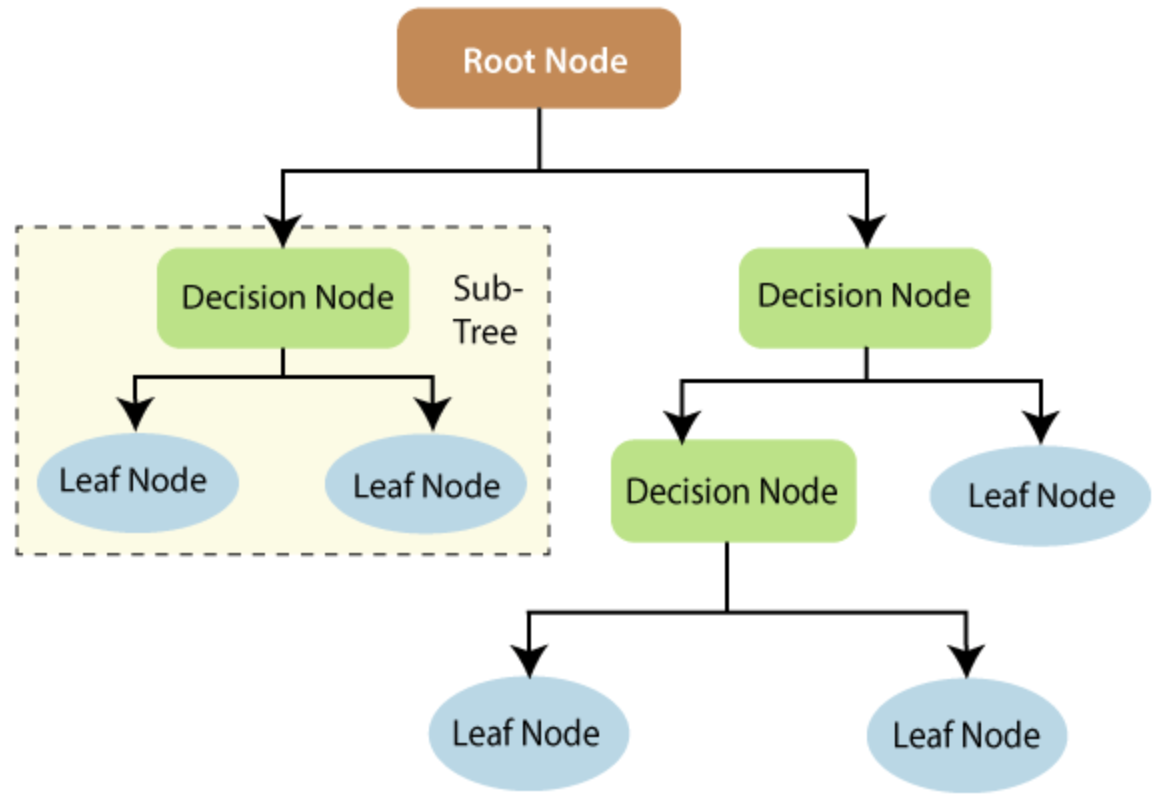

In [4]:
# Decision Tree for regression example
from IPython.display import Image
Image(filename='7.07-decision_tree_terminology.png', width = 500)

### Decision tree for regression

* Here we will take the **example of Boston housing data** as it is a simpler regression problem. We used the Boston data from sklearn datasets in 7.6 as well. The objective was to predict the median value of a house.

* To simplify the case even further, we will take a look at the example where we have to predict the median price of a house based on only one feature lstat.

* After we train the model, this is the decision space we get.
    * **The set of bottom nodes** in the decision tree gives us the partition of the feature space into disjoint regions.
    

* For each region, we calculate the average of the target variable
    * ...falling in that region of the training data.
    * ...That gives us the numerical prediction value.



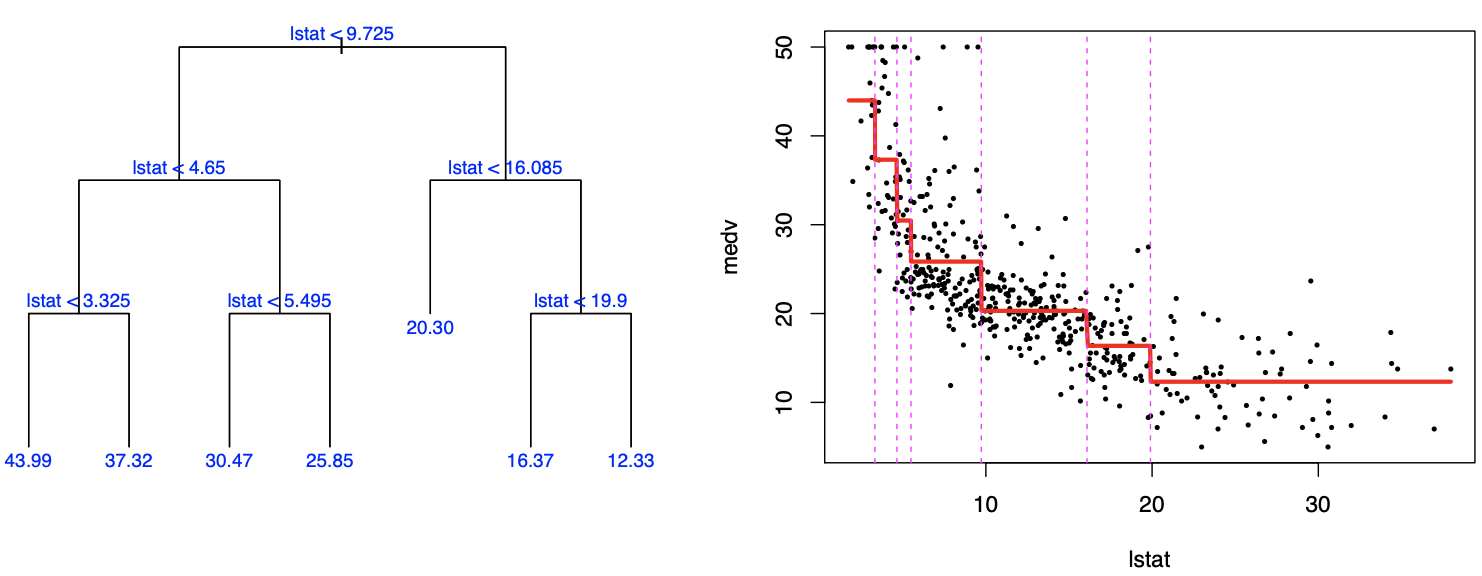

In [2]:
# Decision Tree for regression example
from IPython.display import Image
Image(filename='7.07-regression_trees.png') 

## Decision Tree for Classification

* Classification trees works in the same way as the regression trees except that instead of the final prediction being the mean of the target values falling in the disjointed region at the end, here the final prediction is the most occurring class in that region. 

* In the example above, instead of having one predictor we have multiple predictors. The decision space is divided among them. The decision at the bottom node still follows the same methodology. The final prediction is the most occurring class in the bottom nodes.


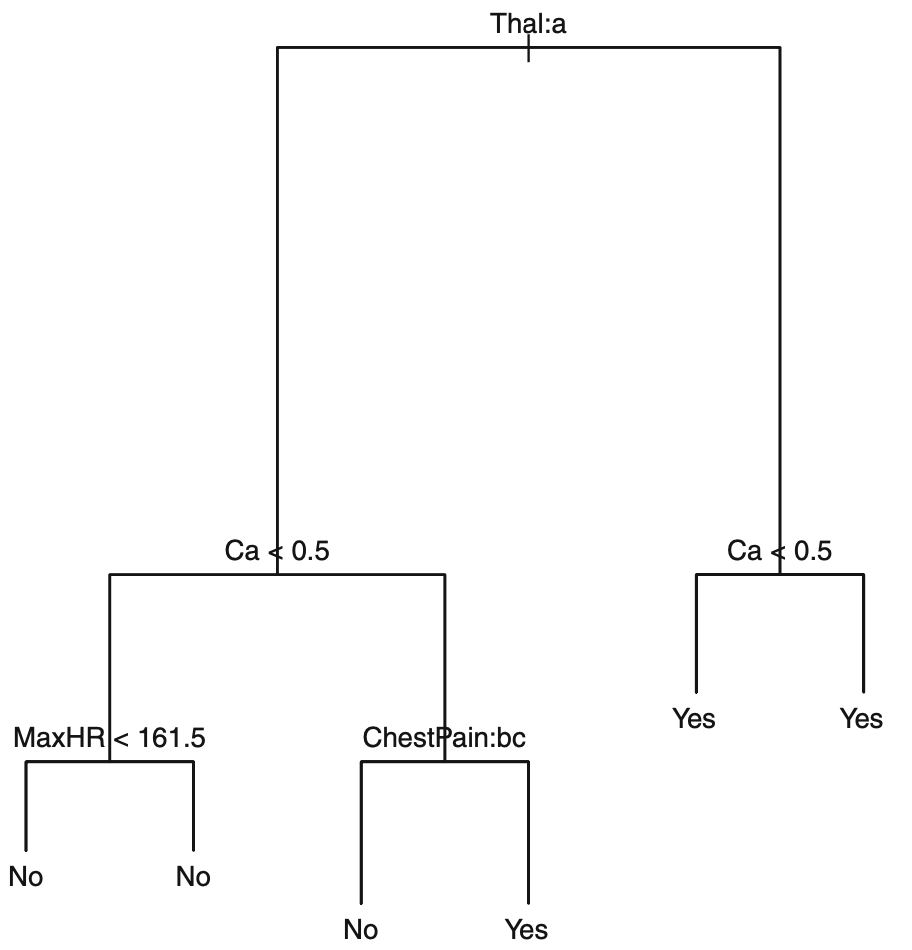

In [6]:
Image(filename='7.07-classification_tree.png', width=300) 

# Activity 1

# Lesson 2

* Simple **implementation** of regression trees
* Simple **implementation** of classification trees


### regression type

In [8]:
import pandas as pd
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

(506, 13)
(506,)


0.7754603268580498

### classification type

In [32]:
import pandas as pd
from sklearn.datasets import load_iris

data =load_iris()

X, y = load_iris(return_X_y=True)
print(X.shape)
print(y.shape)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

(150, 4)
(150,)


0.94

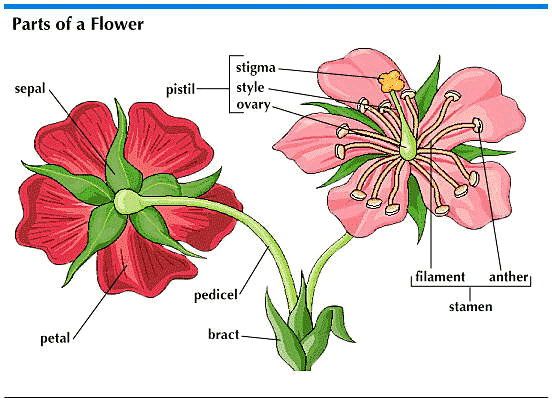

In [38]:
Image(filename='flower-part-purpose-seeds-making-insects-.jpg', width=500) 

In [23]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

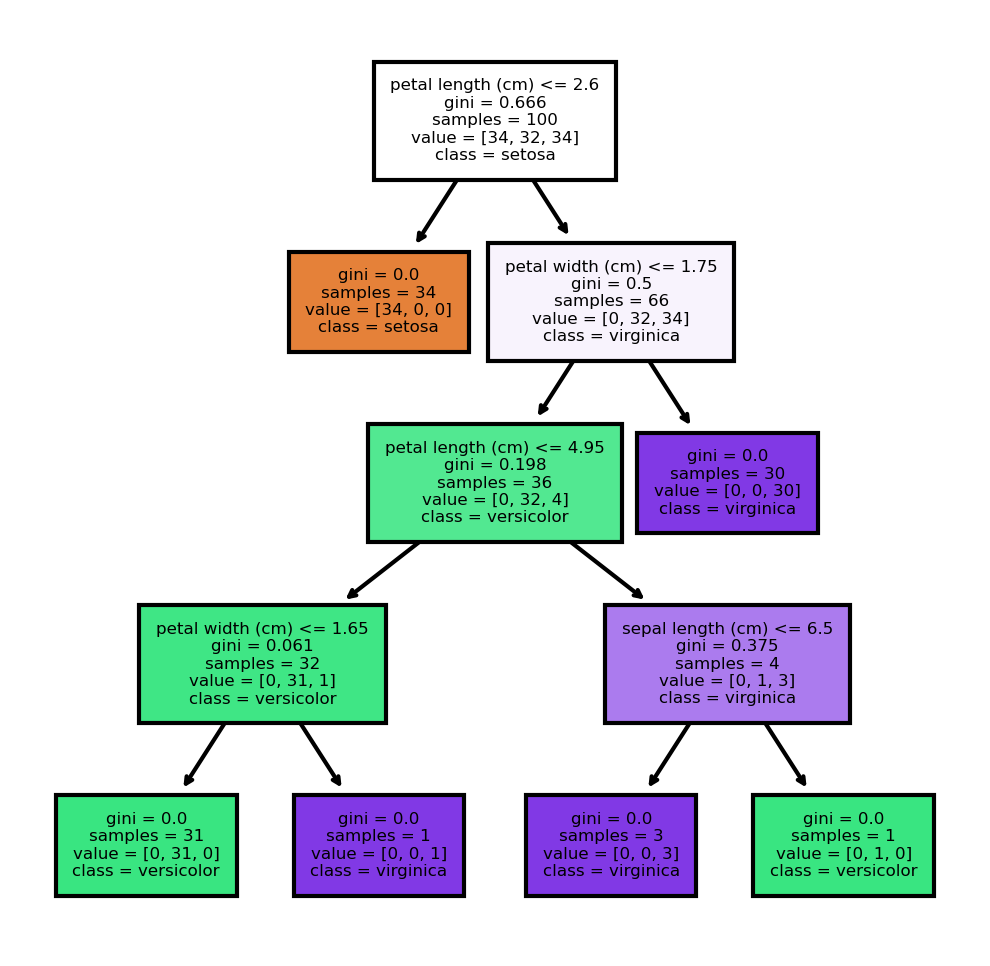

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(#nrows = 1,
                         #ncols = 1,
                         figsize = (4,4),
                         dpi=300)

fn = data['feature_names']
cn = data['target_names']

plot_tree(model,
        feature_names = fn, 
        class_names=cn,
        filled = True,
          fontsize=4,
          ax=axes
         );

## Parameters (more in Activity 3)

* so far we only used the **default** parameters for a DT

* some parameters:

    * **criterion**{“gini”, “entropy”}, default=”gini” - Defines the criteria for decision split,
      * **gini index** - **impurity based** aims for homogeneity of the labels at a node
      * **entropy**, aims for information gain
      (slightly different math)
      * research says: doesn't have that much impact on tree performance

    * **min_samples_split**: int or float, default=2 -
        * minimum number of training samples at a decision split point, if it is to be further split into children nodes.

    * **min_samples_leaf**: int or float, default=1 -
        * minimum number of training samples at a decision split point, if it is to be further split into leaf nodes.

    *Note for instructor: min_samples_split and min_samples_leaf, they look very similar but difference is between children node and leaf node. Children node can be split further while a leaf node can't be.*

    * **max_depthint**, default=None - Defines the maximum depth of the tree. Each level of the decision split can be thought about as a depth level where the root node signifies level 0, next internal node as level 1 and so on and so forth.

    * **max_featuresint**, float or {“auto”, “sqrt”, “log2”}, default=None - This defines the maximum number of features to pick up every time when comparing the gini index or the entropy criteria for choosing the feature to make the split decision.


# Activity 3

Go through article and read more about parameters: [Decision Tree](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680).

# Lesson 4
* topics here: cross validation
    * Leave one out cross validation
    * K fold cross validation